<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Perceptron_IntroToSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment 8: Perceptron and Intro to SVM

## Learning Objectives

At the end of the experiment, you will be able to

- understand the concept of Perceptron
- experiment using the perceptron algorithm


### Introduction

Artificial Neural Network (ANN) is a Machine Learning model inspired by the networks of biological neurons found in our brains.

#### Biological Neurons

Biological neurons send and receive signals from the brain. The main component functions of a neuron are - Dendrite: Receives signals from other neurons; Soma: Processes the information; Axon: Transmits the output of this neuron; Synapse: Point of connection to other neurons.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width= 500 px/>
</center>

Individual biological neurons are organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons.


#### Artificial Neurons

Modeled after human brain activity, artificial neurons are digital constructs that simulate the behavior of biological neurons in some ways. The first computational model of an (artificial) neuron was proposed by Warren McCulloch (neuroscientist) and Walter Pitts (logician) in 1943. 

As shown below, it may be divided into 2 parts. The first part, g takes an input, performs aggregation, and based on the aggregated value, the second part, f, makes a decision. Understand further through an example 'Watch a football game' in this [article](https://towardsdatascience.com/mcculloch-pitts-model-5fdf65ac5dd1).

<br><br>
<center>
<img src="https://miro.medium.com/max/369/1*fDHlg9iNo0LLK4czQqqO9A.png" width= 320px/>
</center>

<br><br>


### The Perceptron

The Perceptron is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (shown in the figure below) called a **threshold logic unit (TLU)**. The inputs and the output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $$(z = w_1 x_1 + w_2 x_2 + ⋯ + w_n x_n = x^⊺ w)$$, then applies a step function to that sum and outputs the result: $$h_w(x) = step(z)$$, where $z = x^⊺ w$.
<br><br>
<center>
<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 400px/>
</center>

$\hspace{10cm} \text {Threshold logic unit}$
<br><br>
The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$heaviside (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &0&  if\ \  z < 0\\ 
    &1&  if\ \  z \ge 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

$$sgn (z) = \begin{equation}
\left\{ 
  \begin{aligned}
    &-1&  if\ \  z < 0\\ 
    &0&  if\ \  z = 0\\
    &1&  if\ \  z > 0\\ 
  \end{aligned}
  \right.
\end{equation}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. 



The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the Perceptron convergence theorem.



## Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa, and Iris Virginica) each has 50 instances. 


For each flower, we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm


## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives an excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue, or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


In [6]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [7]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [8]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "ADSMI_B1_NB_Assignment_08_Perceptron_Intro_to_SVM_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
#  ipython.magic("sx pip -qq install dtreeviz ")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Please complete Id and Password cells before running setup


### Import required packages

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

### Load the Data

In [10]:
# Load data using Pandas
iris = pd.read_csv("/content/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.shape

(150, 6)

In [12]:
# As we see the data is in dequential order, lets shuffle the data using .sample()
df = iris.sample(frac = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
110,111,6.5,3.2,5.1,2.0,Iris-virginica


### Data pre-processing

1. **species** is our target variable. Drop Iris-virginica from species column. Select Iris-setosa and Iris-versicolor as your target varaible.

2. Converting categorical values to numerical values where species contain categorical values such as 'Iris-setosa', 'Iris-virginica' and replacing them with with 1, 0


In [13]:
df.drop('Id',axis = 1,inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica


From the above data select only 2 species 'Iris-setosa', 'Iris-versicolor'

In [15]:
df = df[df['Species'] != 'Iris-virginica']

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor


In [19]:
# From the above we have selected only setosa and versicolor and not virginica (!='virginica')
df['Species'] = df['Species'].replace(['Iris-setosa','Iris-versicolor'],[1, 0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df.loc[[5, 60, 90]]  # Select few samples to see the DataFrame

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
5,5.4,3.9,1.7,0.4,1
60,5.0,2.0,3.5,1.0,0
90,5.5,2.6,4.4,1.2,0


### Single Layer Perceptron

A node, also called a neuron or Perceptron, is a computational unit that has one or more weighted input connections. Use a transfer function that combines the inputs and gives the output connection. Nodes are then organized into layers to comprise a network.

Let us see how the output is measured at each neuron

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/artificial_neuron.png)

### Part-A: Understand Perceptron using mathematical approach

#### Performing for only one sample

In [21]:
# Let us take 5th sample as input x1, x2, x3, x4
one_neuron_inputs  = [5.4, 3.9,  1.7,  0.4]
weights = [0.7, 0.6, -1.0, -1.0] # You can give the random weights w1, w2, w3, w4

In [22]:
# This function returns the sum of product of inputs and weights
def weighted_sum(inputs, weights):
    total = 0
    for inputs_value,weight in zip(inputs, weights):
        total += inputs_value * weight
    return total

In [23]:
# Output of first neuron
Node_input = weighted_sum(one_neuron_inputs, weights)
print(Node_input)

4.019999999999999


**Activation Function**


A Step Function is one of the most common activation function in neural networks. The function produces binary output.

The output is a certain value, $A_1$, if the input sum is above a certain threshold and $A_0$ if the input sum is below a certain threshold. The values used by the Perceptron were $A_1$ = 1 and $A_0$ = 0.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/step_function.png)


These kinds of step activation functions are useful for binary classification schemes. In other words, when we want to classify an input pattern into one of two groups, we can use a binary classifier with a step activation function. Another use for this would be to create a set of small feature identifiers. Each identifier would be a small network that would output a 1 if a particular input feature is present, and a 0 otherwise. Combining multiple feature detectors into a single network would allow a very complicated clustering or classification problem to be solved.

In [24]:
def Step_Fun(number):
    if number >= 2: # Threshold value is 2
        return 1
    else:
        return 0

In [25]:
# Apply the step function where it returns one if node input value is greater than or equal to 2, otherwise returns zero
Node_output = Step_Fun(Node_input)
print(Node_output)

1


#### Performing for all samples

Performing weigthed sum  and Step function for each of the feature by taking random weights and finding accuracy for actuals and predictions. 

In [26]:
samples = df.iloc[:, :4].values
predicted = []
weights = [0.7, 0.6, -1.0, -1.0] # Change the weights and observe the change in accuracy
for sample in samples:
    Node_input = weighted_sum(sample, weights)
    Node_output = Step_Fun(Node_input)
    predicted.append(Node_output)

actual = df.iloc[:, 4].values
print("Actual labels from the data", actual)
print("\n Predicted labels", predicted)

acc = accuracy_score(actual, predicted)
print("Accuracy of the Perceptron using mathematical approach", acc)

Actual labels from the data [1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0]

 Predicted labels [1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0]
Accuracy of the Perceptron using mathematical approach 1.0


### Part- B: Perceptron from Sklearn

1. From the given data, Select features and labels
2. Split the data into train and test sets 
3. Train using perceptron Classifier

In [29]:
labels = df['Species']
features = df.drop('Species', axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.2)

In [31]:
from sklearn.linear_model import Perceptron
model = Perceptron() 
# Fitting the data into the model
model.fit(xtrain, ytrain)
# Predicting the labels for test data
accuracy = model.score(xtest, ytest)
print("Accuracy of the Perceptron using sklearn", accuracy)

Accuracy of the Perceptron using sklearn 1.0


### Intro to Support Vector Machines

#### Motivating Support Vector Machines

we will consider discriminative classification: rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

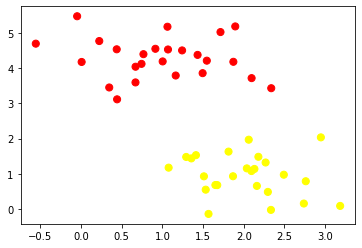

In [32]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

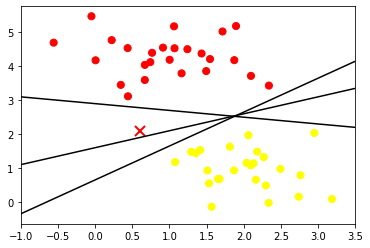

In [33]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

#### Support Vector Machines: Maximizing the Margin

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

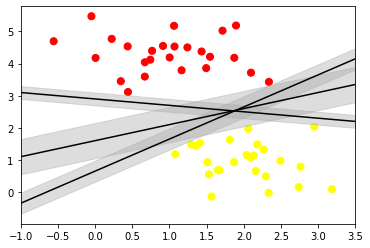

In [34]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

#### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [35]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

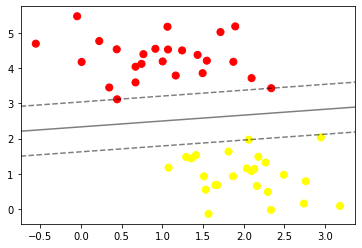

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [38]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### Train a SVM Linear Classifier with Iris Data (multi-class)

In [39]:
model = SVC(kernel='linear')

In [40]:
# Fit the model using training data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model.fit(xtrain, ytrain)

# Predict the model 
predict = model.predict(xtest)

# Calculate the accuracy


cm = confusion_matrix(ytest, predict)
print(cm)
accuracy_score(ytest, predict)

print(classification_report(ytest, predict))


[[ 7  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [41]:
#@title What is the name of the function in the following statement “A perceptron adds up all the weighted inputs it receives, and if it exceeds a certain value, its output is 1, otherwise its output is 0”? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["","Logistic function", "Heaviside step function", "Piece-wise linear function"]

In [42]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]

In [43]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [44]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]

In [45]:
 #@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [46]:
 #@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]

In [47]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
